# Questionario: Detecção de comunidades
### Douglas Decicino de Andrade NUSP:10883512

In [109]:
#Alguns imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
np.random.seed(50)
import pandas as pd

# Calculo da  modularidade para a rede Jazz usando método fastgreedy

In [201]:
#Carregando os dados da rede.
G = nx.read_edgelist(r"data\jazz.txt", nodetype=int, data=(('weight',float),))

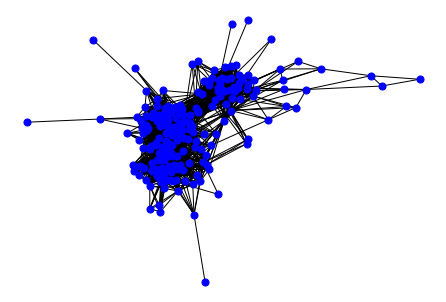

In [202]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Como queremos pegar apenas o componente principal, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.


In [203]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])#Selecionando apenas o maior componente

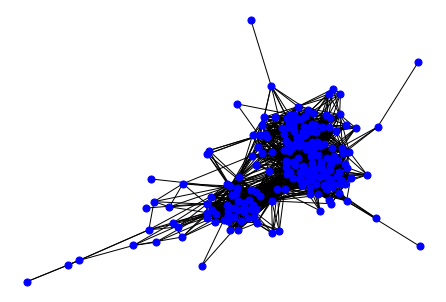

In [204]:
#Plot da rede com a maior componente apenas.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Às vezes, os rótulos dos nós não estão na ordem sequencial ou são utilizadas strings. Para facilitar nossa implementação, vamos converter os rótulos em inteiros começando com o índice zero, porque o Python usa indexação baseada em 0.

In [208]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Vamos ver quantos nós e quantas arestas possuem nossa rede

In [186]:
N = len(G)
M = G.number_of_edges()
print('Número de Nós:', N)
print('Número de arestas:', M)

Número de Nós: 198
Número de arestas: 2742


##### Segue abaixo o código para calcular a modularidade usando método fastgreedy

In [190]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [186, 187, 188]


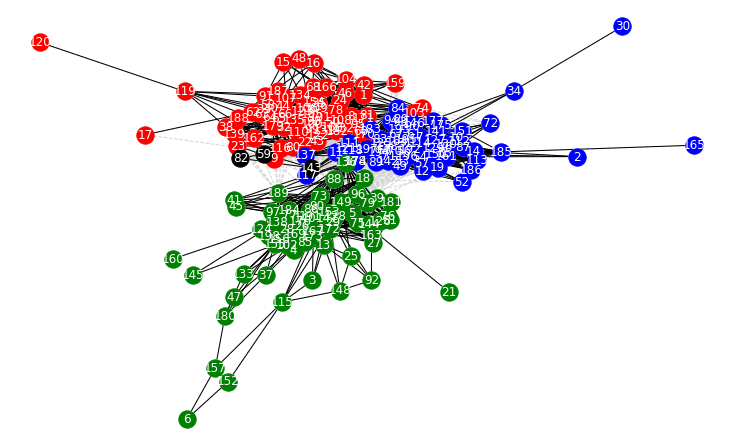

In [188]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.show(True)

### Agora vamos calcular a modularidade para a partição encontrada

In [191]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [192]:
print("Modularity Q = ", modularity(G,communities))

Modularity Q =  0.4389078153753761


##### Segue abaixo o código para calcular a modularidade usando método  Louvain

In [211]:
from community import community_louvain
partitions =community_louvain.best_partition(G)

In [212]:
partitions

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 3,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 3,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 3,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 3,
 54: 3,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 2,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 3,
 74: 3,
 75: 3,
 76: 1,
 77: 1,
 78: 1,
 79: 3,
 80: 3,
 81: 3,
 82: 3,
 83: 3,
 84: 3,
 85: 3,
 86: 3,
 87: 3,
 88: 2,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 2,
 95: 2,
 96: 2,
 97: 3,
 98: 3,
 99: 3,
 100: 0,
 101: 2,
 102: 3,
 103: 3,
 104: 3,
 105: 3,
 106: 2,
 107: 3,
 108: 3,
 109: 3,
 110: 3,
 111: 3,
 112: 2,
 113: 3,
 114: 3,
 115: 2,
 116: 3,
 117: 2,
 118: 3,
 119: 2,
 120: 0,
 121: 2,
 122: 2,
 12

### Agora vamos calcular a modularidade para a partição encontrada


In [219]:
print("Modularity Q = ", modularity(G,partitions))

Modularity Q =  0.4398035981338919


In [215]:
fig= plt.figure(figsize=(10,6))

N = 128
tau1 = 3
tau2 = 1.5
mu = 0.05
k =16
minc = 32
maxc = 32
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray', 
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

AttributeError: module 'networkx' has no attribute 'LFR_benchmark_graph'

<Figure size 720x432 with 0 Axes>

In [2]:
pip freeze | %{$_.split('==')[0]} | %{pip install --upgrade $_}

Note: you may need to restart the kernel to use updated packages.


'%{$_.split' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
